In [1]:
import numpy as np

class Perceptron:
    def __init__(self, input_size, weights, bias):
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = 0.1

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return 1 if summation >= 0 else 0

    def train(self, inputs, target):
        prediction = self.predict(inputs)
        error = target - prediction
        self.weights += self.learning_rate * error * inputs
        self.bias += self.learning_rate * error
        return error

def boolean_function_test(perceptron, boolean_function):
    inputs = boolean_function["inputs"]
    targets = boolean_function["targets"]

    print(f"\nTraining for {boolean_function['name']} function:")
    print("Initial Weights:", perceptron.weights)

    for epoch in range(1000):  # Adjust the number of epochs as needed
        total_errors = 0
        for i in range(len(inputs)):
            input_values = np.array(inputs[i])
            target_value = targets[i]
            error = perceptron.train(input_values, target_value)
            total_errors += abs(error)

        print(f"Epoch {epoch + 1}, Total Errors: {total_errors}")

        if total_errors == 0:
            print(f"\nConverged after {epoch + 1} epochs.")
            break

    print("Final Weights:", perceptron.weights)
    print("Final Bias:", perceptron.bias)

# Define boolean functions
and_function = {
    "name": "AND",
    "inputs": [[0, 0], [0, 1], [1, 0], [1, 1]],
    "targets": [0, 0, 0, 1],
    "initial_weights": [0.5, 0.5],  # Manually input initial weights
    "initial_bias": -0.5  # Manually input initial bias
}

or_function = {
    "name": "OR",
    "inputs": [[0, 0], [0, 1], [1, 0], [1, 1]],
    "targets": [0, 1, 1, 1],
    "initial_weights": [0.5, 0.5],  # Manually input initial weights
    "initial_bias": -0.5  # Manually input initial bias
}

nand_function = {
    "name": "NAND",
    "inputs": [[0, 0], [0, 1], [1, 0], [1, 1]],
    "targets": [1, 1, 1, 0],
    "initial_weights": [-0.5, -0.5],  # Manually input initial weights
    "initial_bias": 0.5  # Manually input initial bias
}

# Initialize perceptron with manual weights
perceptron_and = Perceptron(input_size=2, weights=and_function["initial_weights"], bias=and_function["initial_bias"])
perceptron_or = Perceptron(input_size=2, weights=or_function["initial_weights"], bias=or_function["initial_bias"])
perceptron_nand = Perceptron(input_size=2, weights=nand_function["initial_weights"], bias=nand_function["initial_bias"])

# Test each boolean function
boolean_function_test(perceptron_and, and_function)
boolean_function_test(perceptron_or, or_function)
boolean_function_test(perceptron_nand, nand_function)



Training for AND function:
Initial Weights: [0.5 0.5]
Epoch 1, Total Errors: 1
Epoch 2, Total Errors: 0

Converged after 2 epochs.
Final Weights: [0.5 0.4]
Final Bias: -0.6

Training for OR function:
Initial Weights: [0.5 0.5]
Epoch 1, Total Errors: 0

Converged after 1 epochs.
Final Weights: [0.5 0.5]
Final Bias: -0.5

Training for NAND function:
Initial Weights: [-0.5 -0.5]
Epoch 1, Total Errors: 0

Converged after 1 epochs.
Final Weights: [-0.5 -0.5]
Final Bias: 0.5


In [2]:
import tensorflow as tf
import numpy as np

# Define XOR data
inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
targets = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Define the model with regularization and dropout
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(units=4, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with early stopping and validation split
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(inputs, targets, epochs=10000, verbose=0, callbacks=[early_stopping], validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(inputs, targets)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Predict XOR outputs
predictions = model.predict(inputs)
rounded_predictions = np.round(predictions)
print("\nPredictions:")
print(rounded_predictions)


1/1 [==============================] - 0s 27ms/step - loss: 0.7063 - accuracy: 0.2500

Model Accuracy: 25.00%
1/1 [==============================] - 0s 84ms/step

Predictions:
[[1.]
 [1.]
 [0.]
 [1.]]


Global Minima found at x = -1.1105093598463913, f(x) = -3.2463942726873016
Number of iterations: 14


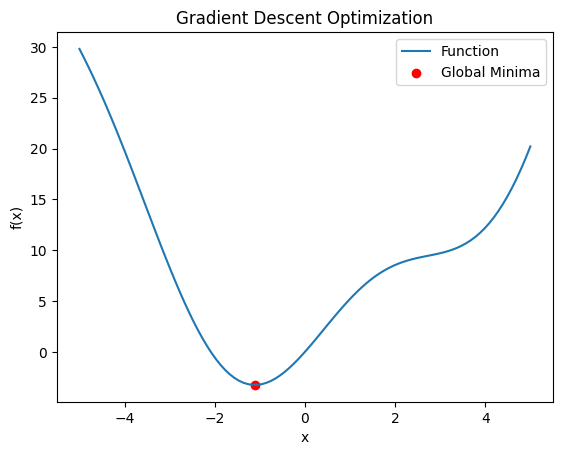

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the equation to minimize
def equation(x):
    return x**2 + 5*np.sin(x)

# Define the derivative of the equation (gradient)
def gradient(x):
    return 2*x + 5*np.cos(x)

# Gradient Descent Algorithm
def gradient_descent(initial_guess, learning_rate, tolerance):
    x = initial_guess
    iterations = 0

    while True:
        x_new = x - learning_rate * gradient(x)
        if abs(x_new - x) < tolerance:
            break
        x = x_new
        iterations += 1

    return x, iterations

# Visualization
def plot_results(x_vals, y_vals, minima_x, minima_y):
    plt.plot(x_vals, y_vals, label='Function')
    plt.scatter(minima_x, minima_y, color='red', label='Global Minima')
    plt.title('Gradient Descent Optimization')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    plt.show()

# Parameters
initial_guess = 0.0
learning_rate = 0.1
tolerance = 1e-6

# Run gradient descent
minima_x, iterations = gradient_descent(initial_guess, learning_rate, tolerance)
minima_y = equation(minima_x)

# Generate data for visualization
x_vals = np.linspace(-5, 5, 100)
y_vals = equation(x_vals)

# Print results
print(f"Global Minima found at x = {minima_x}, f(x) = {minima_y}")
print(f"Number of iterations: {iterations}")

# Plot the results
plot_results(x_vals, y_vals, minima_x, minima_y)
